In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# 📊 Introducción a las Series de Tiempo

Una **serie de tiempo** es simplemente una colección de datos que se registran en orden cronológico. Es decir, datos que se van recolectando a medida que pasa el tiempo.

### 🕒 ¿Dónde vemos series de tiempo en la vida real?

- El clima diario de una ciudad (temperatura, lluvia, humedad)
- Las ventas mensuales de una tienda
- El número de pasos que caminas cada día
- El número de visitas que recibe una página web cada hora
- La cantidad de electricidad que consumes cada mes

> **Idea clave**: en una serie de tiempo, el orden importa. No es lo mismo vender 100 unidades en enero y 200 en febrero, que al revés. ¡El tiempo es parte fundamental de los datos!

### 🎯 ¿Para qué se usan las series de tiempo?

- Para **analizar comportamientos** (¿las ventas suben en diciembre?)
- Para **predecir el futuro** (¿cuánto venderemos el próximo mes?)
- Para **tomar decisiones** basadas en patrones pasados

### 📌 Características importantes:
- **Fecha/Hora** asociada a cada dato
- **Frecuencia**: cada cuánto se mide (diaria, mensual, anual...)
- **Valor**: lo que estamos midiendo (temperatura, ventas, etc.)

A lo largo de este notebook vamos a aprender cómo visualizar, analizar y hacer predicciones simples con series de tiempo usando Python.


Datos de temperatura diaria:


,Temperatura (°C)
Fecha,
2024-01-01,22
2024-01-02,21
2024-01-03,23
2024-01-04,24
2024-01-05,25
2024-01-06,26
2024-01-07,27


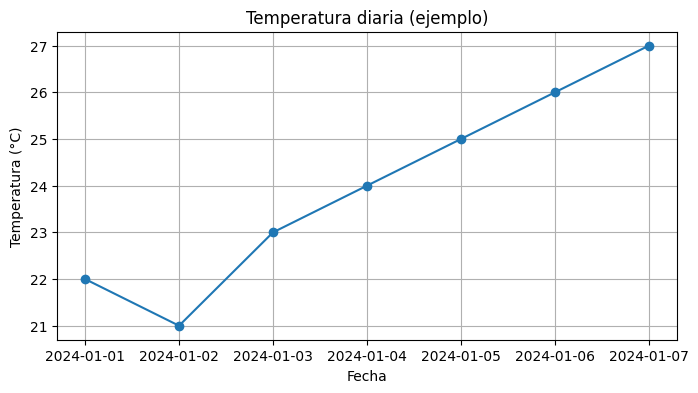

In [ ]:
# Creamos una serie de ejemplo: temperatura diaria durante una semana
fechas = pd.date_range(start="2024-01-01", periods=7, freq='D')
temperaturas = [22, 21, 23, 24, 25, 26, 27]

# Convertimos en un DataFrame
df = pd.DataFrame({'Fecha': fechas, 'Temperatura (°C)': temperaturas})
df.set_index('Fecha', inplace=True)

# Mostramos la tabla
print("Datos de temperatura diaria:")
display(df)

# Graficamos la serie de tiempo
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Temperatura (°C)'], marker='o')
plt.title('Temperatura diaria (ejemplo)')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()


# 🔍 Componentes de una Serie de Tiempo

Cuando observamos una serie de tiempo (como las ventas de un negocio mes a mes), podemos notar que no se comporta al azar. Muchas veces, hay **patrones** ocultos en los datos. Estos patrones se conocen como los **componentes de una serie de tiempo**.

Veamos los más importantes:

### 📈 1. Tendencia (Trend)
Es el cambio general en los datos a lo largo del tiempo. Puede ser una subida, una bajada o simplemente estabilidad.

**Ejemplo real:**  
- Las ventas de celulares pueden aumentar cada año debido al crecimiento del mercado.

### 📆 2. Estacionalidad (Seasonality)
Son patrones que se repiten cada cierto tiempo de forma regular.

**Ejemplo real:**  
- En diciembre muchas tiendas venden más por Navidad.
- En julio las heladerías venden más por el calor.

### 🔀 3. Ruido o Aleatoriedad (Noise)
Son variaciones impredecibles que no siguen ningún patrón. Pueden deberse al azar o a situaciones inesperadas.

**Ejemplo real:**  
- Una tormenta inesperada hace que nadie salga a comprar un día específico.

---

### 🎯 ¿Por qué es útil conocer estos componentes?

Porque nos ayuda a entender:
- Si nuestros datos siguen algún patrón.
- Si podemos **predecir** el futuro de manera más inteligente.
- Qué parte del comportamiento es esperable y cuál es aleatorio.

En el siguiente bloque, veremos cómo visualizar estos componentes con Python.


C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\3916142058.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start="2020-01-01", periods=48, freq='M')


🔍 Descomposición de: Estacionalidad


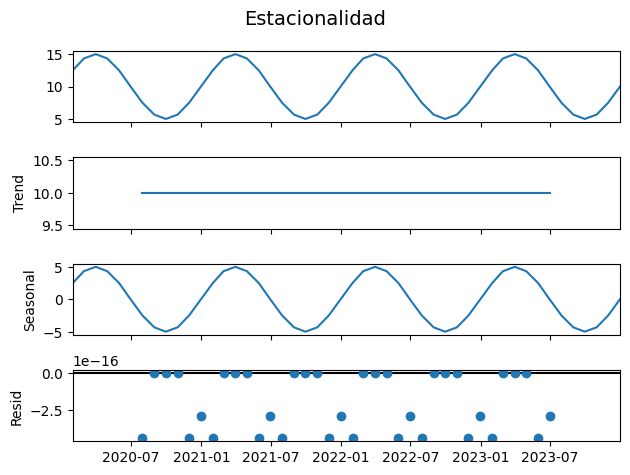

🔍 Descomposición de: Sin Estacionalidad


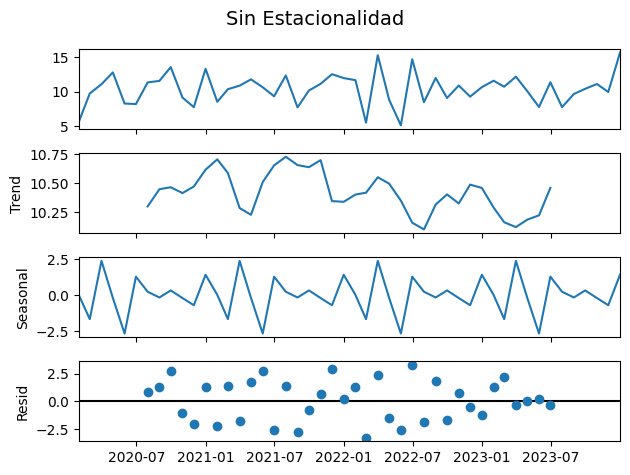

🔍 Descomposición de: Estacionaria


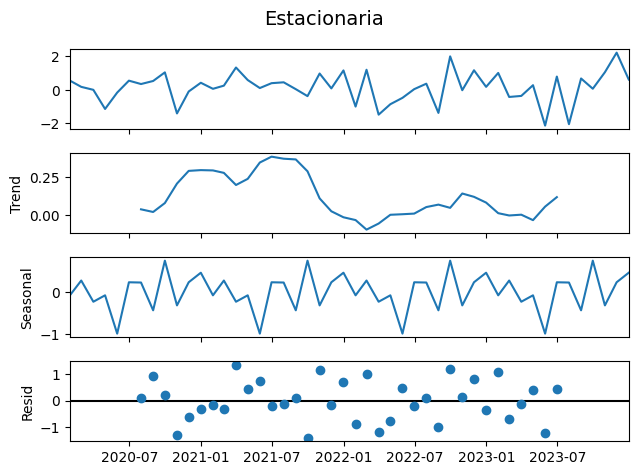

🔍 Descomposición de: No Estacionaria


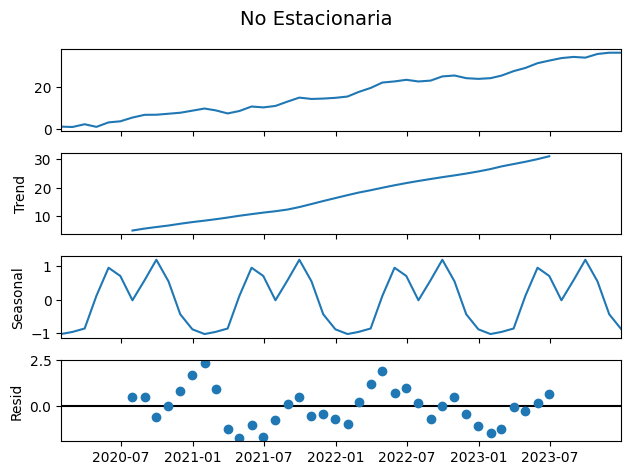

🔍 Descomposición de: Tendencia + Estacionalidad


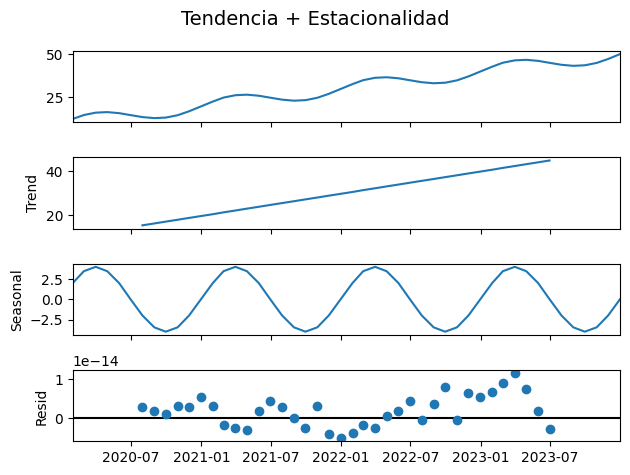

In [ ]:
# Generamos las fechas
fechas = pd.date_range(start="2020-01-01", periods=48, freq='M')

# Series simuladas
estacional = 10 + np.sin(2 * np.pi * fechas.month / 12) * 5
sin_estacionalidad = 10 + np.random.normal(0, 2, size=48)
estacionaria = np.random.normal(0, 1, size=48)
no_estacionaria = np.cumsum(np.random.normal(0.5, 1, size=48))
tendencia_estacionalidad = np.linspace(10, 50, 48) + np.sin(2 * np.pi * fechas.month / 12) * 4

# Empaquetamos las series
series_dict = {
    'Estacionalidad': estacional,
    'Sin Estacionalidad': sin_estacionalidad,
    'Estacionaria': estacionaria,
    'No Estacionaria': no_estacionaria,
    'Tendencia + Estacionalidad': tendencia_estacionalidad
}

# Función para descomponer y graficar
def descomponer_y_graficar(nombre, datos, freq=12):
    serie = pd.Series(datos, index=fechas)
    try:
        resultado = seasonal_decompose(serie, model='additive', period=freq)
        print(f"🔍 Descomposición de: {nombre}")
        resultado.plot()
        plt.suptitle(nombre, fontsize=14)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"⚠️ No se pudo descomponer la serie '{nombre}': {e}")

# Aplicamos descomposición a todas
for nombre, datos in series_dict.items():
    descomponer_y_graficar(nombre, datos)


# 🧹 Limpieza y Preparación de Datos Temporales

Antes de analizar o predecir con una serie de tiempo, necesitamos asegurarnos de que los datos estén bien organizados y limpios.

## 🧭 ¿Qué debemos revisar y preparar?

### 🗓 1. Formato de Fechas
Las fechas deben estar en un formato que Python entienda como fechas reales, no como texto. Esto permite hacer operaciones como ordenar, filtrar por mes, o calcular diferencias entre fechas.

### 📏 2. Frecuencia consistente
La serie debe tener un intervalo de tiempo regular (por ejemplo: diaria, mensual o semanal). Si faltan fechas, podríamos completarlas.

### ❌ 3. Datos faltantes o vacíos
A veces, hay días o meses sin datos. Podemos:
- Rellenar con el valor anterior o siguiente.
- Usar la media o interpolar.
- O simplemente eliminar si es muy poco.

---

## ✨ ¿Qué herramientas usamos?

Usaremos la librería **pandas**, que nos permite:

- Convertir texto a fechas (`pd.to_datetime`)
- Revisar frecuencia de fechas
- Rellenar o interpolar datos faltantes
- Cambiar la frecuencia de los datos (resamplear)

En el siguiente bloque de código vamos a practicar con un ejemplo paso a paso.


In [ ]:
# Simulamos una serie con algunas fechas faltantes y valores perdidos
datos = {
    'Fecha': ['2023-01-01', '2023-01-02', '2023-01-04', '2023-01-05', '2023-01-07'],
    'Visitas': [100, 120, None, 150, 130]
}

df = pd.DataFrame(datos)

# 1. Convertimos el texto a fecha real
df['Fecha'] = pd.to_datetime(df['Fecha'])

# 2. Establecemos la columna de fecha como índice
df.set_index('Fecha', inplace=True)
df

,Visitas
Fecha,
2023-01-01,100.0
2023-01-02,120.0
2023-01-04,NaN
2023-01-05,150.0
2023-01-07,130.0


In [ ]:
# 3. Reindexamos para que no falte ninguna fecha en el rango
fecha_completa = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(fecha_completa)
# 4. Revisamos los valores faltantes
print("Datos con fechas completas pero con valores faltantes:")
display(df)

,Visitas
2023-01-01,100.0
2023-01-02,120.0
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,150.0
2023-01-06,NaN
2023-01-07,130.0


In [ ]:
# 5. Rellenamos valores faltantes con interpolación (puedes probar otros métodos)
df['Visitas'] = df['Visitas'].interpolate()
df

,Visitas
2023-01-01,100.0
2023-01-02,120.0
2023-01-03,130.0
2023-01-04,140.0
2023-01-05,150.0
2023-01-06,140.0
2023-01-07,130.0


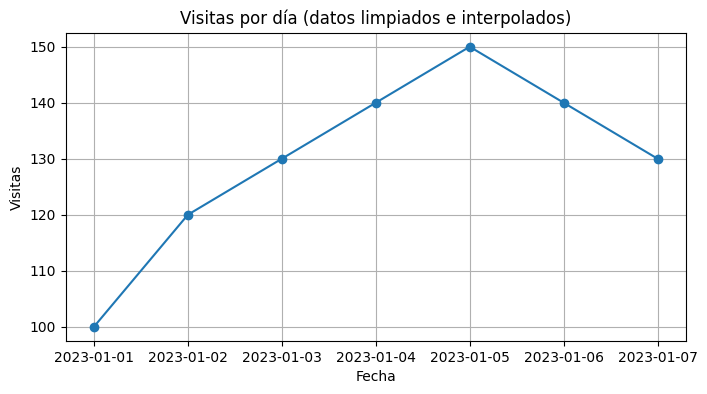

In [ ]:
# 6. Graficamos la serie ya limpia
plt.figure(figsize=(8, 4))
plt.plot(df.index, df['Visitas'], marker='o', linestyle='-')
plt.title("Visitas por día (datos limpiados e interpolados)")
plt.xlabel("Fecha")
plt.ylabel("Visitas")
plt.grid(True)
plt.show()


# 📈 Modelos Básicos de Pronóstico

Una vez que tenemos una serie de tiempo limpia, podemos intentar **predecir el futuro** con ayuda de modelos simples de pronóstico. Estos modelos son como herramientas básicas que nos dan una primera idea de qué podría pasar después.

## 🎯 ¿Qué es pronosticar?
Es como tratar de adivinar el futuro… ¡pero con datos! En lugar de adivinar al azar, usamos el comportamiento del pasado para hacer una estimación informada.

## 🧰 Modelos Básicos que veremos

### 1. Pronóstico de Valor Constante (Último Valor)
Asume que el futuro será igual al último dato observado. Es útil cuando los datos no cambian mucho.

### 2. Promedio Móvil Simple
Promedia los últimos valores (por ejemplo, los últimos 3 meses) para estimar el siguiente valor. Es útil cuando hay muchas subidas y bajadas, pero sin una tendencia clara.

### 3. Suavizado Exponencial Simple
Le da más peso a los datos más recientes. Es como el promedio móvil, pero más inteligente. Útil cuando queremos reaccionar más rápido a los cambios recientes.

## 📌 ¿Cuándo usar estos modelos?
- Cuando no necesitamos gran precisión pero sí una idea general.
- Como punto de partida antes de usar modelos más complejos.
- Para entender cómo se comportan nuestros datos antes de aplicar Machine Learning o modelos estadísticos avanzados.

A continuación, veremos cómo funcionan estos modelos con una serie de ejemplo.


In [ ]:
# Simulamos una serie de tiempo con tendencia leve
np.random.seed(42)
fechas = pd.date_range(start='2022-01-01', periods=24, freq='M')
valores = 50 + np.arange(24) * 0.8 + np.random.normal(0, 2, 24)
# Creamos un DataFrame
df = pd.DataFrame({'Fecha': fechas, 'Valor': valores}).set_index('Fecha')
df.head()

C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\618882841.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start='2022-01-01', periods=24, freq='M')


,Valor
Fecha,
2022-01-31,50.993428
2022-02-28,50.523471
2022-03-31,52.895377
2022-04-30,55.446060
2022-05-31,52.731693


🔹 ¿Qué hace smoothing_level?

    El parámetro smoothing_level (también llamado α, o alpha) controla cuánto peso se le da al valor más reciente comparado con los anteriores en el cálculo del suavizado.

c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\725612883.py:27: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


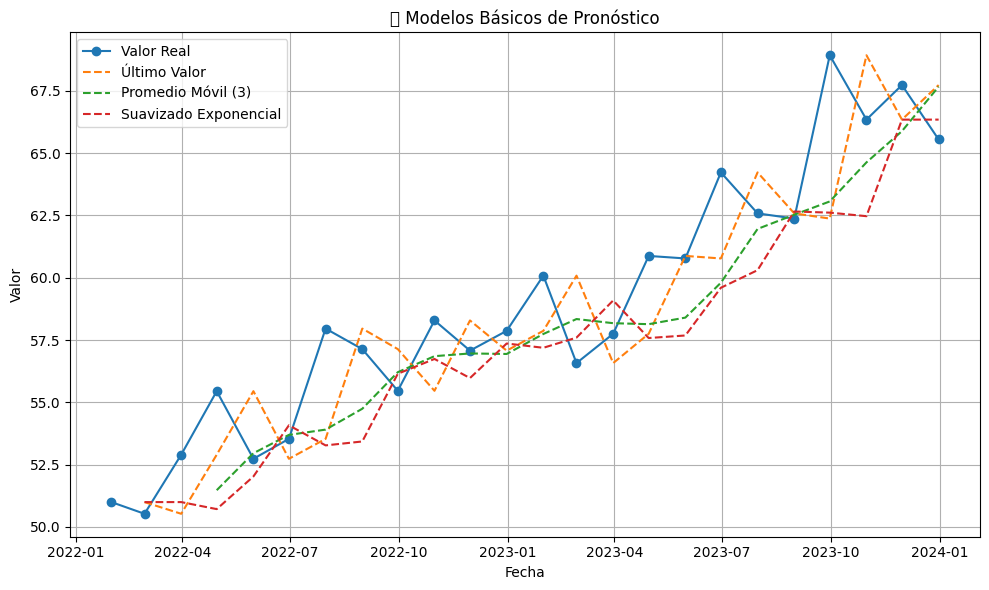

,Valor,Suavizado Exponencial,Ultimo Valor,Promedio Móvil (3)
Fecha,,,,
2023-08-31,62.375393,62.658623,62.583952,62.528928
2023-09-30,68.931298,62.613820,62.375393,63.062613
2023-10-31,66.348447,62.470764,68.931298,64.630214
2023-11-30,67.735056,66.347084,66.348447,65.885046
2023-12-31,65.550504,66.347902,67.735056,67.671600


In [ ]:
# -------------------------
# 1. Último Valor
df['Ultimo Valor'] = df['Valor'].shift(1)

# -------------------------
# 2. Promedio Móvil (ventana de 3)
df['Promedio Móvil (3)'] = df['Valor'].rolling(window=3).mean().shift(1)

# -------------------------
# 3. Suavizado Exponencial Simple
modelo_exp = SimpleExpSmoothing(df['Valor'], initialization_method="legacy-heuristic")
ajuste_exp = modelo_exp.fit(smoothing_level=0.6)
df['Suavizado Exponencial'] = ajuste_exp.fittedvalues.shift(1)

# -------------------------
# Visualizamos
plt.figure(figsize=(10, 6))
plt.plot(df['Valor'], label='Valor Real', marker='o')
plt.plot(df['Ultimo Valor'], label='Último Valor', linestyle='--')
plt.plot(df['Promedio Móvil (3)'], label='Promedio Móvil (3)', linestyle='--')
plt.plot(df['Suavizado Exponencial'], label='Suavizado Exponencial', linestyle='--')
plt.title('📉 Modelos Básicos de Pronóstico')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostramos la tabla final
df.tail(5)


# 🧠 Introducción: Modelos Estadísticos para Series de Tiempo

Cuando queremos predecir el futuro usando datos que cambian con el tiempo, a veces necesitamos modelos un poco más inteligentes que solo mirar números. Los **modelos estadísticos** nos ayudan a entender cómo los datos se relacionan con su propio pasado para hacer predicciones.

---

## ¿Qué es un modelo estadístico en series de tiempo?

Es como una receta que usa datos anteriores para explicar cómo cambian las cosas y tratar de adivinar qué pasará después.

---

## Modelos estadísticos básicos que debes conocer

### 1. Modelo AR (Autoregresivo)

- **¿Qué hace?** Mira los valores pasados para predecir el valor de hoy.  
- **Ejemplo:** Si ayer hizo frío, probablemente hoy también hará frío.  
- **¿Cuándo usarlo?** Cuando lo que pasó antes tiene influencia directa en lo que pasa ahora.

### 2. Modelo MA (Media Móvil)

- **¿Qué hace?** Se fija en los errores o cambios inesperados de días anteriores para ajustar la predicción.  
- **Ejemplo:** Si ayer tuvimos un cambio inesperado en la temperatura, eso puede afectar hoy.  
- **¿Cuándo usarlo?** Cuando los errores del pasado ayudan a entender el presente.

### 3. Modelo ARMA (Autoregresivo de Media Móvil)

- **¿Qué hace?** Combina los dos anteriores: mira valores pasados y errores para predecir.  
- **¿Cuándo usarlo?** Cuando los datos no cambian mucho con el tiempo pero tienen esas dos características.

### 4. Modelo ARIMA (Autoregresivo Integrado de Media Móvil)

- **¿Qué hace?** Primero, elimina las tendencias (como un aumento constante), luego usa ARMA para predecir.  
- **Ejemplo:** Si las ventas suben todos los meses, primero quitamos esa subida para ver mejor los patrones.  
- **¿Cuándo usarlo?** Cuando los datos tienen tendencia o no son estables.

### 5. Modelo SARIMA (ARIMA con Estacionalidad)

- **¿Qué hace?** Es igual que ARIMA, pero también considera patrones estacionales.  
- **Ejemplo:** Las heladerías venden más en verano y menos en invierno, ese patrón se repite cada año.  
- **¿Cuándo usarlo?** Cuando los datos tienen tendencia y repiten ciclos con frecuencia fija.

---

## ¿Por qué aprender estos modelos?

Porque nos ayudan a entender el pasado, predecir el futuro y tomar mejores decisiones basadas en datos reales.

---

En la próxima sesión haremos ejemplos en Python para que veas cómo funcionan.


C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\1584211395.py:35: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\1584211395.py:35: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128256 (\N{TWISTED RIGHTWARDS ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


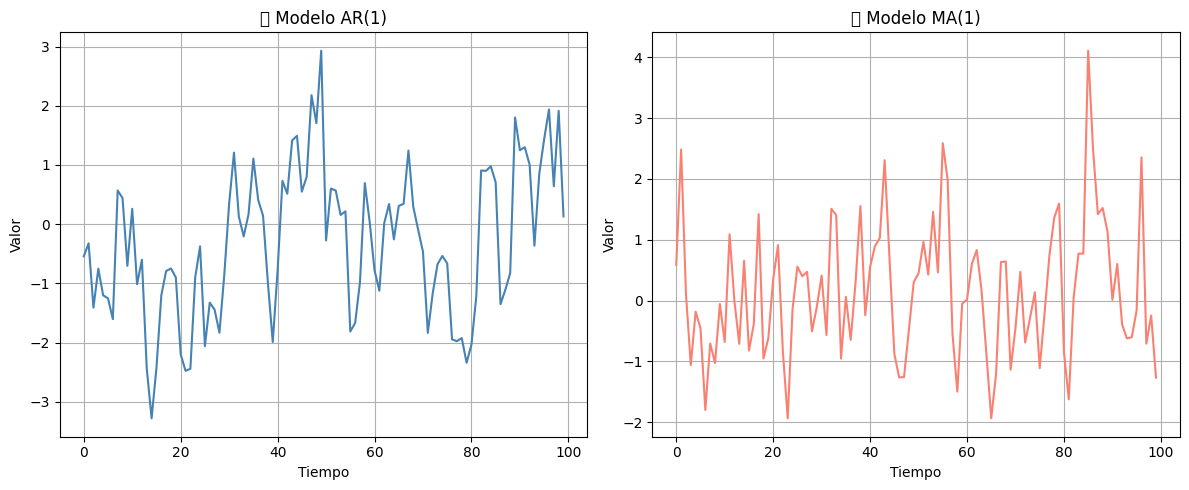

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess

# Simulación de modelos AR y MA

# --- Modelo AR(1): y_t = 0.8*y_{t-1} + ruido
ar = np.array([1, -0.8])  # el signo es inverso por convención
ma = np.array([1])
AR_simulado = ArmaProcess(ar, ma).generate_sample(nsample=100)

# --- Modelo MA(1): y_t = ruido + 0.5*ruido_{t-1}
ar2 = np.array([1])
ma2 = np.array([1, 0.5])
MA_simulado = ArmaProcess(ar2, ma2).generate_sample(nsample=100)

# --- Graficamos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(AR_simulado, label='AR(1)', color='steelblue')
plt.title('🔁 Modelo AR(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MA_simulado, label='MA(1)', color='salmon')
plt.title('🔀 Modelo MA(1)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)

plt.tight_layout()
plt.show()


# 🔄 ACF (Función de Autocorrelación) y PACF (Función de Autocorrelación Parcial)

Cuando modelamos series de tiempo, necesitamos **medir cuánto depende un dato de los anteriores**.  
Para ello usamos dos herramientas visuales muy útiles:

| Nombre | ¿Qué mide? | ¿Cómo interpretarlo? | ¿Para qué sirve? |
|--------|------------|----------------------|------------------|
| **ACF (Autocorrelation Function)** | La **correlación total** entre el valor actual y los valores en distintos rezagos (lags). | Barras altas → fuerte relación; barras dentro de la franja azul → correlación ≈ 0 (ruido). | Detectar estacionalidad y cuántos rezagos introducir en la parte **MA** de un modelo. |
| **PACF (Partial Autocorrelation Function)** | La **correlación “pura”** entre el valor actual y un rezago específico, **quitando** el efecto de los rezagos intermedios. | Barras altas indican dependencia directa; permite ver la influencia “neta” de ese rezago. | Elegir cuántos rezagos incluir en la parte **AR** de un modelo. |

> 🗒️ **Analogía rápida**  
> - **ACF:** “¿Qué tan parecido soy a mi ‘yo’ de ayer, de hace 2 días, 3 días…?”  
> - **PACF:** “¿Qué tan parecido soy a mi ‘yo’ de hace 3 días **descontando** la influencia que tuvo mi ‘yo’ de ayer y antier?”

---

## Pasos típicos

1. **Graficar ACF y PACF.**  
2. Contar cuántas barras sobresalen la franja azul (nivel de confianza).  
3. Usar ese número como guía:  
   - Barras significativas en ACF → orden **q** (MA)  
   - Barras significativas en PACF → orden **p** (AR)

A continuación verás un ejemplo práctico en Python.


C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\2668912270.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fechas = pd.date_range(start="2022-01-01", periods=60, freq="M")


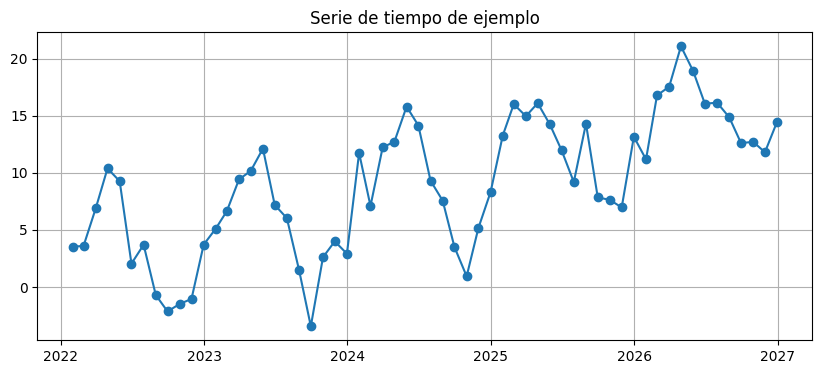

C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\2668912270.py:32: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Andres Agudelo\AppData\Local\Temp\ipykernel_36804\2668912270.py:32: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Andres Agudelo\Documents\python-env\ds_s13_ts\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


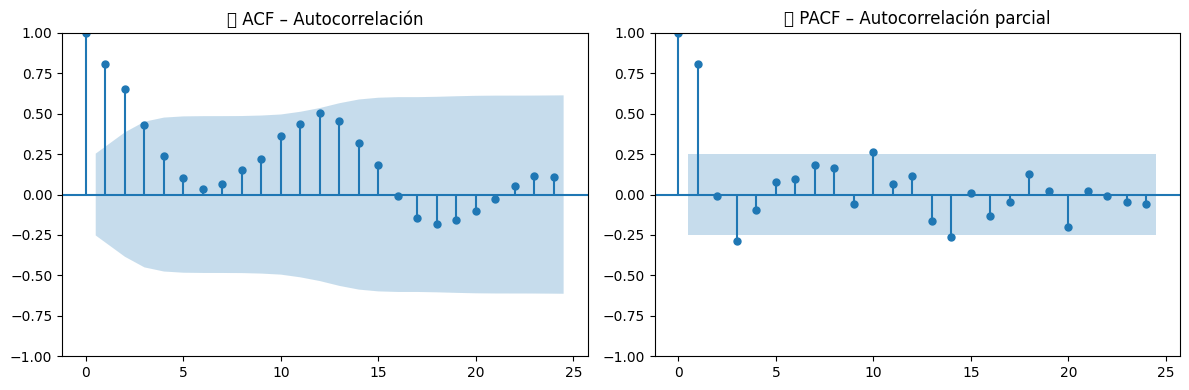

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# --------- 1. Creamos una serie de tiempo de ejemplo ---------
np.random.seed(0)
fechas = pd.date_range(start="2022-01-01", periods=60, freq="M")
# Serie con tendencia leve + estacionalidad + ruido
serie = (0.3 * np.arange(60)               # tendencia
         + 5 * np.sin(2 * np.pi * (fechas.month-1) / 12)  # estacionalidad anual
         + np.random.normal(0, 2, 60))     # ruido

serie = pd.Series(serie, index=fechas, name="Valor")

# --------- 2. Trazamos la serie ----------
plt.figure(figsize=(10,4))
plt.plot(serie, marker="o")
plt.title("Serie de tiempo de ejemplo")
plt.grid(True)
plt.show()

# --------- 3. Graficamos ACF y PACF ----------
fig, axes = plt.subplots(1, 2, figsize=(12,4))

plot_acf(serie, lags=24, ax=axes[0])
axes[0].set_title("🔄 ACF – Autocorrelación")

plot_pacf(serie, lags=24, ax=axes[1], method="ywm")
axes[1].set_title("🎯 PACF – Autocorrelación parcial")

plt.tight_layout()
plt.show()

# Nota: observa cuántas barras sobresalen de la franja azul;
# eso orienta la elección de p (PACF) y q (ACF) para modelos ARIMA.


# 📊 Interpretación de ACF y PACF para elegir modelos ARIMA

Cuando queremos identificar el tipo de modelo adecuado para una serie de tiempo, los **gráficos de ACF (Autocorrelación)** y **PACF (Autocorrelación Parcial)** nos dan pistas muy valiosas.

Dependiendo de cómo se comporten estos gráficos, podemos inferir si la serie sigue un modelo **AR (Autoregresivo)**, **MA (Media Móvil)** o una combinación de ambos: **ARMA**.

---

## 🧩 Comportamientos típicos de ACF y PACF

| Modelo       | ACF                        | PACF                         |
|--------------|----------------------------|-------------------------------|
| **AR(1)**     | Decaimiento geométrico      | Corte después del lag 1       |
| **AR(p)**     | Decaimiento geométrico      | Corte después del lag `p`     |
| **MA(1)**     | Corte después del lag 1     | Decaimiento geométrico        |
| **MA(q)**     | Corte después del lag `q`   | Decaimiento geométrico        |
| **ARMA(p, q)**| Decaimiento geométrico      | Decaimiento geométrico        |

---

### 🎯 ¿Qué significan "Corte" y "Decaimiento Geométrico"?

- **Corte (Cutoff)**: las barras del gráfico se ven grandes solo hasta cierto lag, y luego caen abruptamente dentro del área de no significancia. Esto indica que solo los primeros lags son importantes.

- **Decaimiento Geométrico**: las barras se van reduciendo gradualmente, como una curva suave. Esto sugiere una relación más compleja entre el presente y muchos valores pasados.

---

## 🛠️ Cómo usar esta información

1. **Si el PACF tiene un corte** y el ACF decae gradualmente → la serie sigue un modelo **AR(p)**.
2. **Si el ACF tiene un corte** y el PACF decae gradualmente → la serie sigue un modelo **MA(q)**.
3. **Si ambos decaen gradualmente** → la serie podría seguir un modelo combinado **ARMA(p, q)**.
4. **Si la serie tiene tendencia** → primero debes diferenciarla y luego aplicar esta lógica para un modelo **ARIMA(p, d, q)**.

---

## 🎓 Ejemplo práctico:

- El PACF se corta después del lag 2 → `p = 2`
- El ACF se corta después del lag 1 → `q = 1`

➡️ Modelo sugerido: **ARMA(2, 1)**  
Si antes aplicaste una diferenciación (por ejemplo, `d = 1`), el modelo sería: **ARIMA(2, 1, 1)**

---


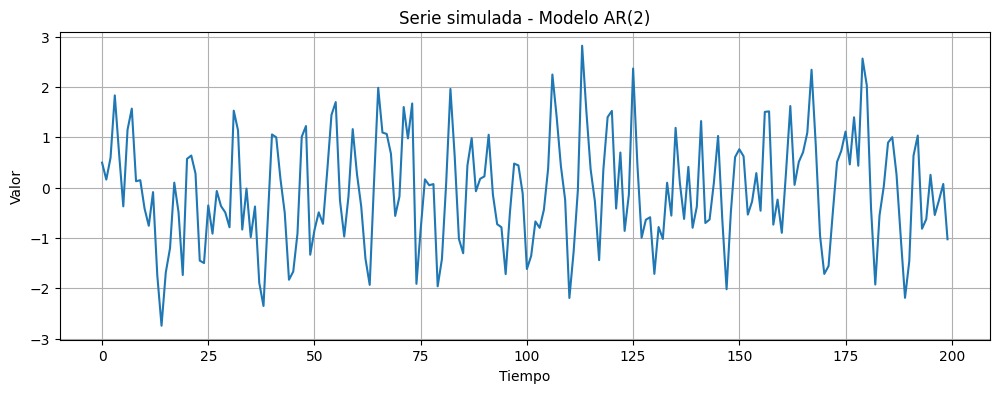

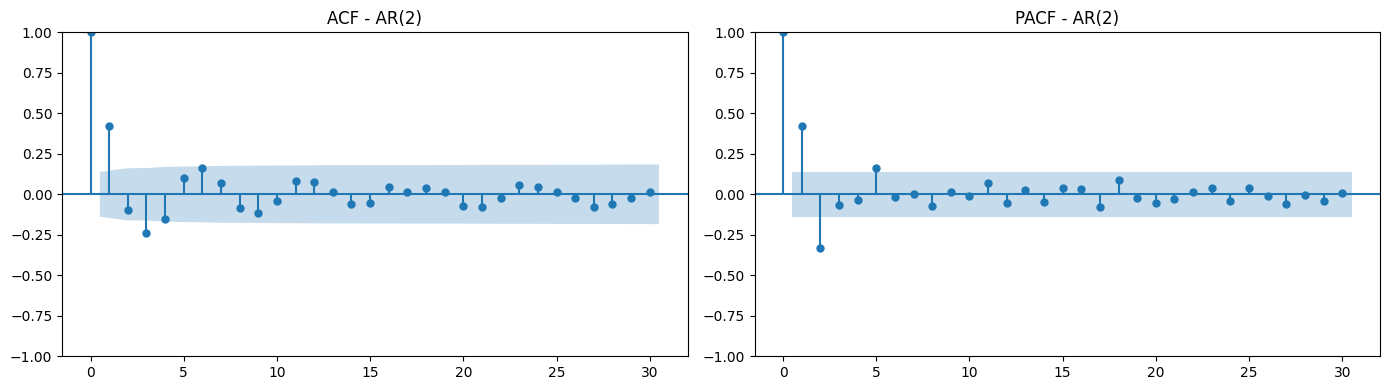

In [ ]:
# 🔢 Configuración general
np.random.seed(42)
n_samples = 200

# 🔷 Modelo AR(2): Y_t = 0.6*Y_{t-1} - 0.3*Y_{t-2} + ε_t
ar_coeffs = np.array([1, -0.6, 0.3])  # Signos invertidos por convención
ma_coeffs = np.array([1])
ar_process = ArmaProcess(ar_coeffs, ma_coeffs)
ar_data = ar_process.generate_sample(nsample=n_samples)

# 🎨 Visualización: Serie AR(2)
plt.figure(figsize=(12, 4))
plt.plot(ar_data, label='AR(2)')
plt.title("Serie simulada - Modelo AR(2)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# 📈 ACF y PACF para AR(2)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(ar_data, ax=axes[0], lags=30)
axes[0].set_title("ACF - AR(2)")
plot_pacf(ar_data, ax=axes[1], lags=30, method='ywm')
axes[1].set_title("PACF - AR(2)")
plt.tight_layout()
plt.show()

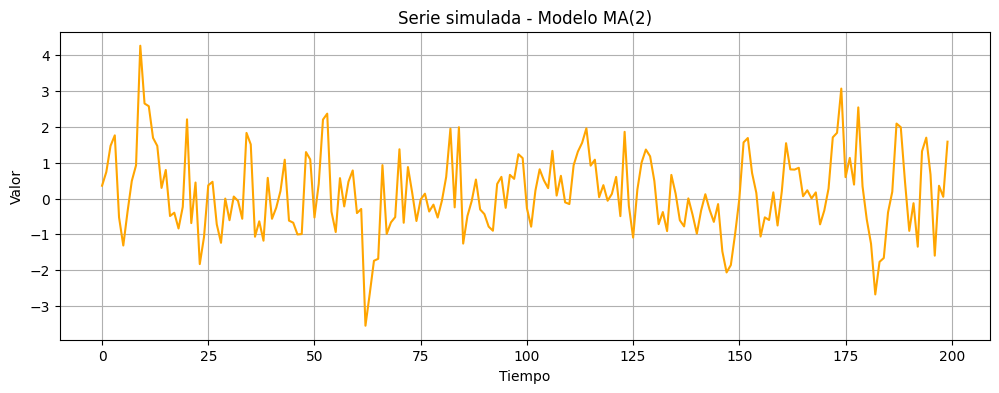

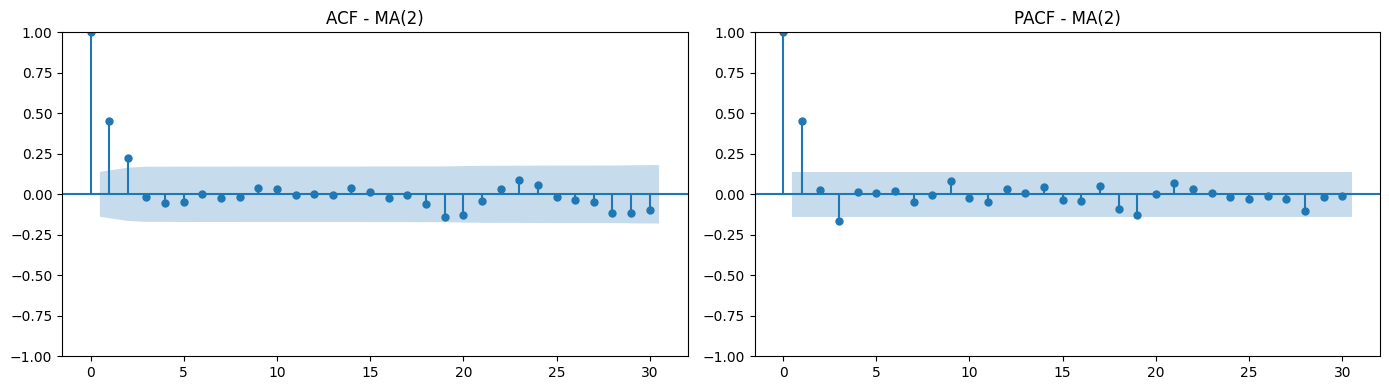

In [ ]:
# 🔶 Modelo MA(2): Y_t = ε_t + 0.5*ε_{t-1} + 0.3*ε_{t-2}
ar_coeffs_ma = np.array([1])
ma_coeffs_ma = np.array([1, 0.5, 0.3])
ma_process = ArmaProcess(ar_coeffs_ma, ma_coeffs_ma)
ma_data = ma_process.generate_sample(nsample=n_samples)

# 🎨 Visualización: Serie MA(2)
plt.figure(figsize=(12, 4))
plt.plot(ma_data, label='MA(2)', color='orange')
plt.title("Serie simulada - Modelo MA(2)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# 📈 ACF y PACF para MA(2)
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(ma_data, ax=axes[0], lags=30)
axes[0].set_title("ACF - MA(2)")
plot_pacf(ma_data, ax=axes[1], lags=30, method='ywm')
axes[1].set_title("PACF - MA(2)")
plt.tight_layout()
plt.show()

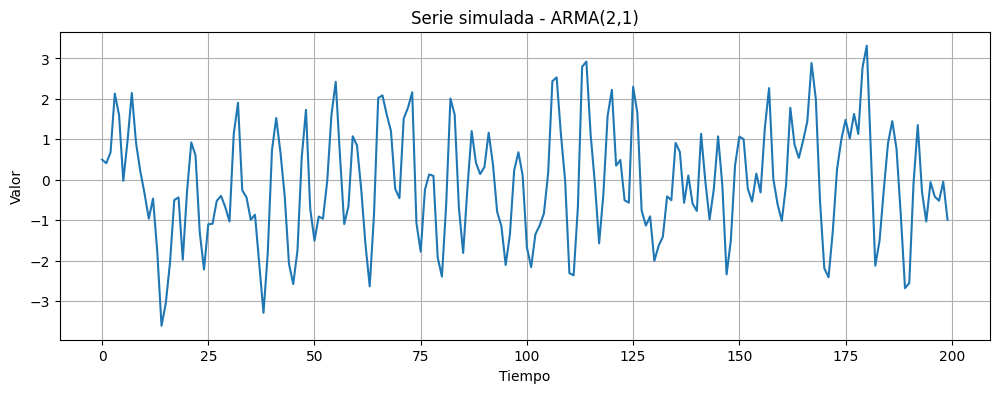

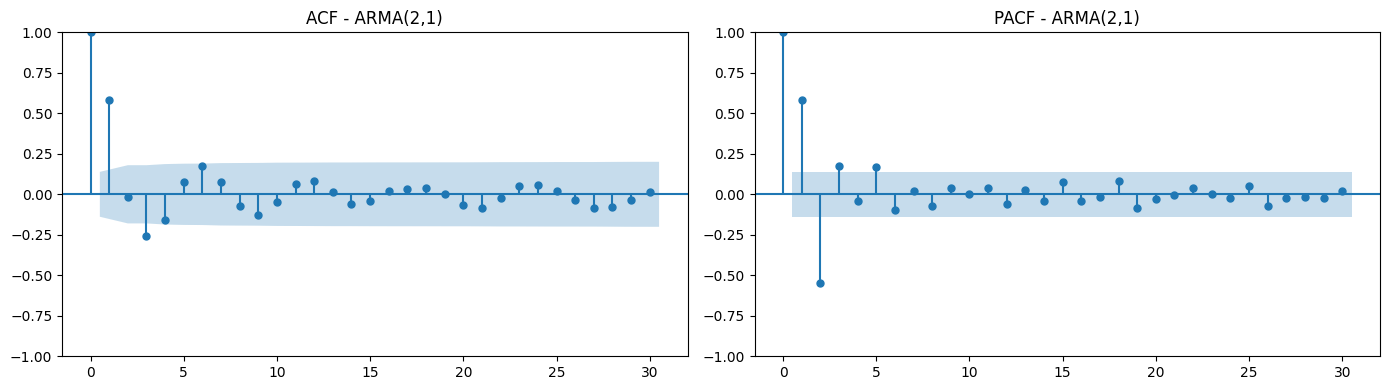

In [ ]:

# 🎯 Simular un modelo ARMA(2,1)
# AR coefficients: phi1=0.6, phi2=-0.3
# MA coefficients: theta1=0.5
ar = np.array([1, -0.6, 0.3])  # Nota: el signo se invierte respecto al modelo matemático
ma = np.array([1, 0.5])

arma_process = ArmaProcess(ar, ma)
np.random.seed(42)  # Para reproducibilidad
arma_data = arma_process.generate_sample(nsample=200)

# 📈 Visualizar la serie simulada
plt.figure(figsize=(12, 4))
plt.plot(arma_data)
plt.title("Serie simulada - ARMA(2,1)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

# 🔍 Graficar ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(arma_data, ax=axes[0], lags=30)
axes[0].set_title("ACF - ARMA(2,1)")

plot_pacf(arma_data, ax=axes[1], lags=30, method='ywm')
axes[1].set_title("PACF - ARMA(2,1)")

plt.tight_layout()
plt.show()


## Ejemplo SARIMA

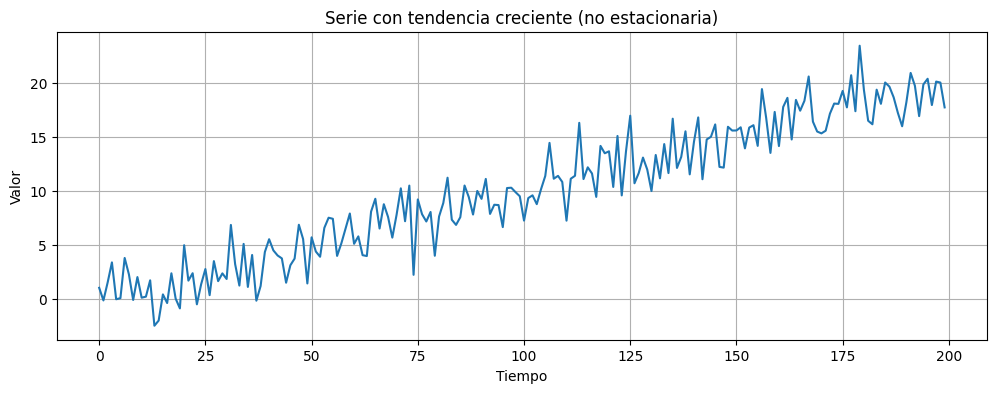

In [ ]:
np.random.seed(42)
n = 200
tendencia = np.linspace(0, 20, n)             # Componente de tendencia creciente
ruido = np.random.normal(0, 2, n)             # Ruido blanco
serie = tendencia + ruido                     # Serie con tendencia creciente


# 📈 Visualizar la serie original
plt.figure(figsize=(12, 4))
plt.plot(serie)
plt.title("Serie con tendencia creciente (no estacionaria)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.grid(True)
plt.show()

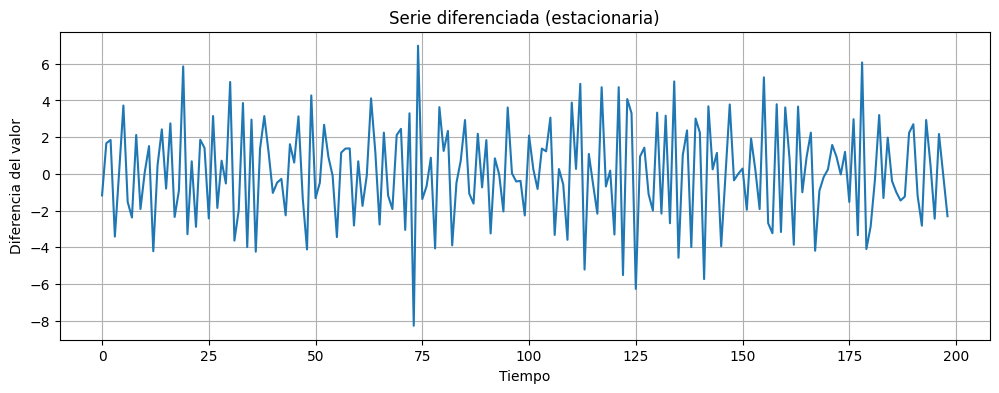

In [ ]:
# 📉 Aplicar diferenciación (d = 1)
serie_diff = np.diff(serie, n=1)

# 📈 Visualizar la serie diferenciada
plt.figure(figsize=(12, 4))
plt.plot(serie_diff)
plt.title("Serie diferenciada (estacionaria)")
plt.xlabel("Tiempo")
plt.ylabel("Diferencia del valor")
plt.grid(True)
plt.show()

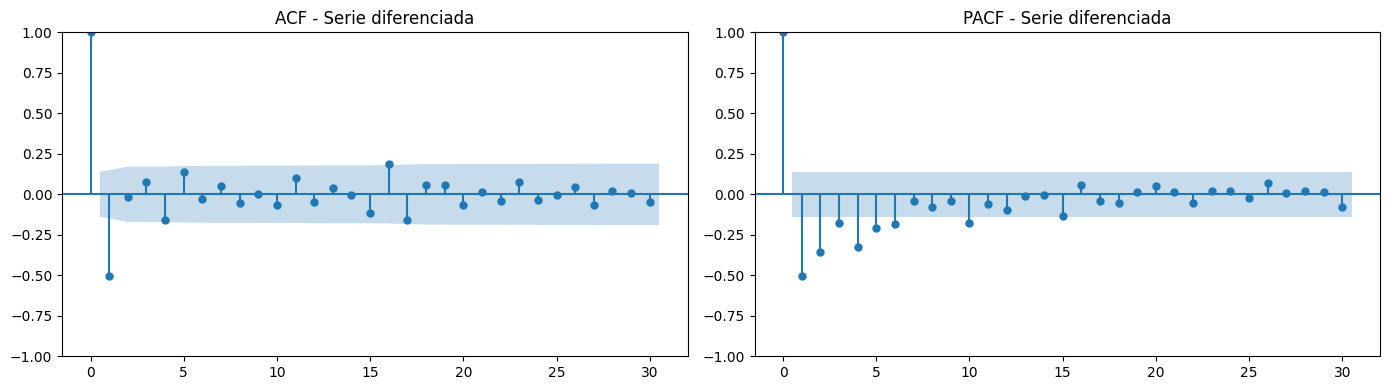

In [ ]:

# 🔍 ACF y PACF de la serie diferenciada
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(serie_diff, ax=axes[0], lags=30)
axes[0].set_title("ACF - Serie diferenciada")
plot_pacf(serie_diff, ax=axes[1], lags=30, method='ywm')
axes[1].set_title("PACF - Serie diferenciada")
plt.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -422.477
Date:                Wed, 21 May 2025   AIC                            852.953
Time:                        17:01:46   BIC                            866.126
Sample:                             0   HQIC                           858.285
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1199      0.107     -1.118      0.264      -0.330       0.090
ar.L2         -0.0878      0.098     -0.894      0.371      -0.280       0.105
ma.L1         -0.7613      0.069    -10.981      0.0

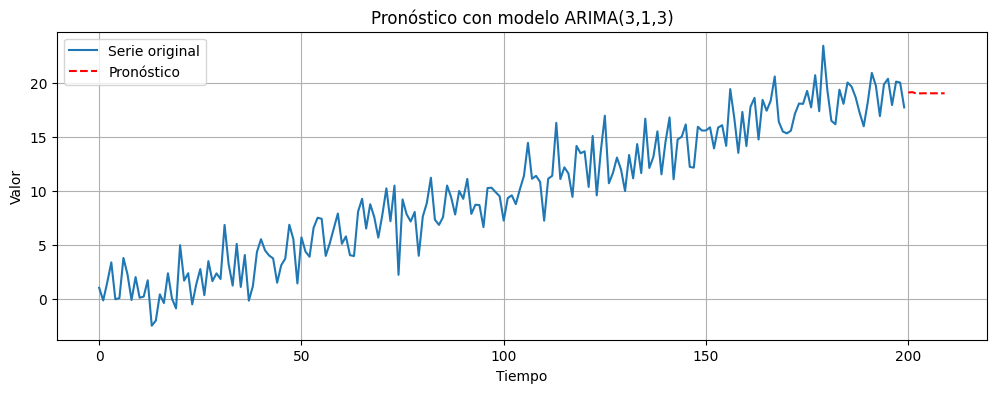

In [ ]:
# ⚙️ Ajustar modelo ARIMA(2,1,1)  ARIMA(P,D,Q)  ARIMA(AR, I, MA)
model = ARIMA(serie, order=(2, 1, 1))
model_fit = model.fit()

# 📋 Mostrar resumen del modelo
print(model_fit.summary())

# 🔮 Pronóstico de los próximos 10 valores
forecast = model_fit.forecast(steps=10)
print("\nPronóstico:")
print(forecast)

# 📊 Visualizar serie original + pronóstico
plt.figure(figsize=(12, 4))
plt.plot(serie, label="Serie original")
plt.plot(np.arange(n, n+10), forecast, label="Pronóstico", color='red', linestyle='--')
plt.title("Pronóstico con modelo ARIMA(3,1,3)")
plt.xlabel("Tiempo")
plt.ylabel("Valor")
plt.legend()
plt.grid(True)
plt.show()